In [70]:
%pip install -r ../requirements.txt


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [71]:
%pip install seaborn
%pip install statsmodels
%pip install pmdarima


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from pmdarima.arima import auto_arima

# Step 2:

In [73]:
# Read data

df_raw_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-a.csv')
df_raw_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv')


test_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-a.csv')
test_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-b.csv')

In [74]:
df_raw_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  420 non-null    object 
 1   cpu       420 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.7+ KB


In [75]:
df_raw_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  600 non-null    object 
 1   cpu       600 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.5+ KB


In [76]:
df_raw_a

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08
...,...,...
415,2017-01-28 01:37:00,2.41
416,2017-01-28 01:38:00,2.16
417,2017-01-28 01:39:00,1.93
418,2017-01-28 01:40:00,2.14


In [77]:
df_raw_b

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08
...,...,...
595,2017-01-28 04:37:00,1.45
596,2017-01-28 04:38:00,1.78
597,2017-01-28 04:39:00,1.77
598,2017-01-28 04:40:00,1.67


In [78]:
# Change variable type

df_interim_a = df_raw_a.copy()
df_interim_b = df_raw_b.copy()

df_interim_a['datetime'] = pd.to_datetime(df_interim_a['datetime'])
df_interim_b['datetime'] = pd.to_datetime(df_interim_b['datetime'])

In [79]:
# Set time as index because we are working with time series

df_interim_a = df_interim_a.set_index(df_interim_a['datetime'])
df_interim_b = df_interim_b.set_index(df_interim_b['datetime'])

In [80]:
df_interim_a

,datetime,cpu
datetime,,
2017-01-27 18:42:00,2017-01-27 18:42:00,1.14
2017-01-27 18:43:00,2017-01-27 18:43:00,1.10
2017-01-27 18:44:00,2017-01-27 18:44:00,1.09
2017-01-27 18:45:00,2017-01-27 18:45:00,1.08
2017-01-27 18:46:00,2017-01-27 18:46:00,1.08
...,...,...
2017-01-28 01:37:00,2017-01-28 01:37:00,2.41
2017-01-28 01:38:00,2017-01-28 01:38:00,2.16
2017-01-28 01:39:00,2017-01-28 01:39:00,1.93


In [81]:
# Drop variables

df_interim_a = df_interim_a.drop('datetime', axis=1)
df_interim_b = df_interim_b.drop('datetime', axis=1)

In [82]:
df_interim_a

,cpu
datetime,
2017-01-27 18:42:00,1.14
2017-01-27 18:43:00,1.10
2017-01-27 18:44:00,1.09
2017-01-27 18:45:00,1.08
2017-01-27 18:46:00,1.08
...,...
2017-01-28 01:37:00,2.41
2017-01-28 01:38:00,2.16
2017-01-28 01:39:00,1.93


In [83]:
df_a = df_interim_a.copy()
df_b = df_interim_b.copy()

In [84]:
df_a.describe()

,cpu
count,420.000000
mean,1.233262
std,0.505668
min,0.570000
25%,0.787500
50%,1.110000
75%,1.582500
max,2.550000


In [85]:
df_b.describe()

,cpu
count,600.000000
mean,1.282733
std,0.484951
min,0.570000
25%,0.840000
50%,1.240000
75%,1.610000
max,2.550000


# Step 3:

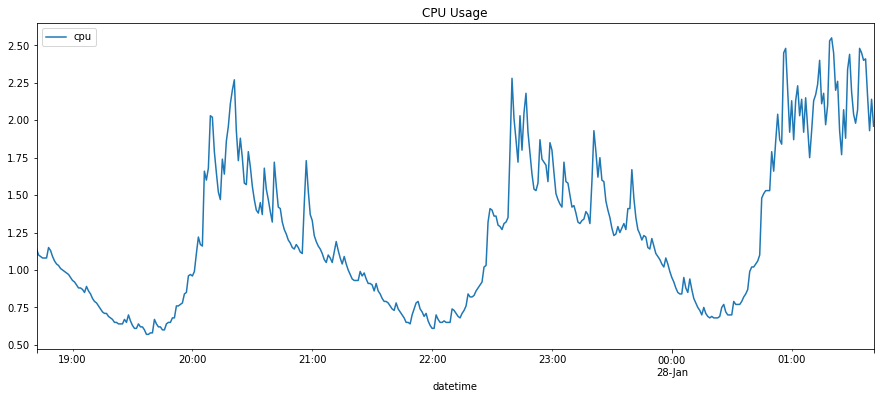

In [86]:
df_a.plot(title="CPU Usage", figsize=(15,6))
plt.show()

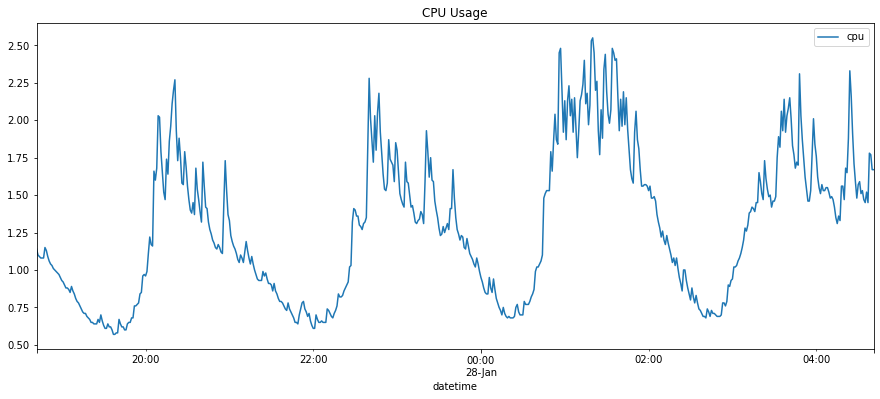

In [87]:
df_b.plot(title="CPU Usage", figsize=(15,6))
plt.show()

In [88]:
res = seasonal_decompose(df_a['cpu'].values, period=60) 

res_observed = res.observed
res_trend = res.trend
res_seasonal = res.seasonal
res_residual = res.resid

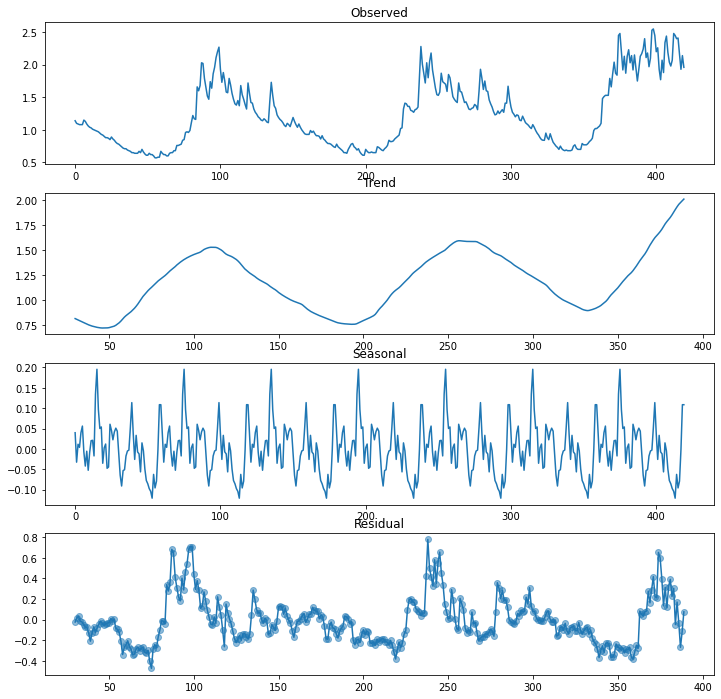

In [89]:
fig,ax = plt.subplots(4, figsize=(12,12))

ax[0].set_title('Observed')
ax[0].plot(res_observed)

ax[1].set_title('Trend')
ax[1].plot(res_trend)

ax[2].set_title('Seasonal')
ax[2].plot(res_seasonal)

ax[3].set_title('Residual')
ax[3].plot(res_residual)
ax[3].scatter(y=res_residual, x=range(len(res_residual)), alpha=0.5)

plt.show()

# Step 4:

In [90]:
stepwise_model = auto_arima(df_a, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=3,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[3]             : AIC=inf, Time=0.48 sec
 ARIMA(0,1,0)(0,1,0)[3]             : AIC=-262.589, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[3]             : AIC=-380.525, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[3]             : AIC=inf, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[3]             : AIC=-263.922, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[3]             : AIC=-430.824, Time=0.18 sec
 ARIMA(1,1,0)(2,1,1)[3]             : AIC=inf, Time=0.53 sec
 ARIMA(1,1,0)(1,1,1)[3]             : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(2,1,0)[3]             : AIC=-432.567, Time=0.07 sec
 ARIMA(0,1,0)(1,1,0)[3]             : AIC=-382.419, Time=0.04 sec
 ARIMA(0,1,0)(2,1,1)[3]             : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(1,1,1)[3]             : AIC=inf, Time=0.12 sec
 ARIMA(0,1,1)(2,1,0)[3]             : AIC=-430.938, Time=0.14 sec
 ARIMA(1,1,1)(2,1,0)[3]             : AIC=inf, Time=0.55 sec
 ARIMA(0,1,0)(2,1,0)[3] intercept   : AIC=-430.572, Time=0.28 sec

B

In [91]:
# Train the model

stepwise_model.fit(df_a)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 3),
      suppress_warnings=True, with_intercept=False)

# Step 5:

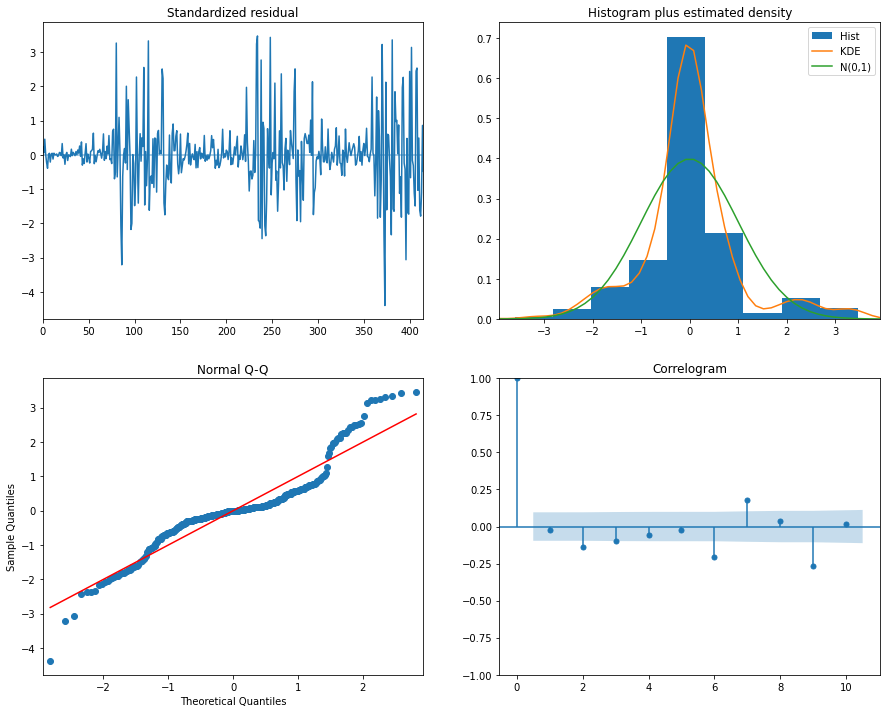

In [92]:
stepwise_model.fit(df_a).plot_diagnostics(figsize=(15, 12))
plt.show()

# Step 6:

In [93]:
test_a.shape

(60, 2)

In [ ]:
test_a

In [95]:
test_a['datetime'] = pd.to_datetime(test_a['datetime'])
test_a = test_a.set_index(test_a['datetime'])
test_a = test_a.drop('datetime', axis=1)

In [ ]:
test_a

In [97]:
df_pred_a=df_a.tail(100)
df_pred_a

,cpu
datetime,
2017-01-28 00:02:00,0.88
2017-01-28 00:03:00,0.85
2017-01-28 00:04:00,0.84
2017-01-28 00:05:00,0.84
2017-01-28 00:06:00,0.95
...,...
2017-01-28 01:37:00,2.41
2017-01-28 01:38:00,2.16
2017-01-28 01:39:00,1.93


In [110]:
test_a_final = pd.concat([df_pred_a, test_a])
test_a_final

,cpu
datetime,
2017-01-28 00:02:00,0.88
2017-01-28 00:03:00,0.85
2017-01-28 00:04:00,0.84
2017-01-28 00:05:00,0.84
2017-01-28 00:06:00,0.95
...,...
2017-01-28 02:37:00,0.73
2017-01-28 02:38:00,0.71
2017-01-28 02:39:00,0.69


In [111]:
test=test_a_final

In [112]:
future_forecast = stepwise_model.predict(n_periods=160)

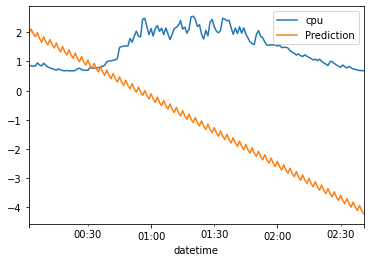

In [113]:
future_forecast = pd.DataFrame(future_forecast,index = test_a_final.index,columns=['Prediction'])
pd.concat([test_a_final,future_forecast],axis=1).plot()
plt.show()

# Step 7:

In [ ]:
#Let’s perform the same anomaly detection on another segment of the CPU utilization dataset captured at a different time by using the cpu-train-b

#Can you visualize any anomaly that occurs a short time after the training period?